# Importación de librerías

In [1]:
import pandas as pd
import numpy as np

# Importación de datamarket.csv

In [2]:
df = pd.read_csv("/content/datamarket.csv")
df.head(3)

,id,url,supermarket,zip_code,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,offer_flag,offer_price,offer_type,insert_date
0,25869112,https://tienda.mercadona.es/product/86503/marg...,mercadona.es,28020,huevos_leche_y_mantequilla|mantequilla_y_marga...,Margarina Flora Original,Tarrina,otras marcas,False,3.45,8.625,kg,False,NaN,NaN,2023-03-15 00:00:00.000
1,25855500,https://www.carrefour.es/supermercado/nuggets-...,carrefour.es,28020,productos_frescos|platos_preparados|fritos,Nuggets de pechuga de pollo 250 g,NaN,otras marcas,False,3.10,12.400,kg,NaN,NaN,NaN,2023-03-15 00:00:00.000
2,25867724,https://tienda.mercadona.es/product/18611/meji...,mercadona.es,28020,conservas_caldos_y_cremas|berberechos_y_mejill...,Mejillones picantes en escabeche Hacendado peq...,Lata,hacendado,True,1.65,23.914,kg,False,NaN,NaN,2023-03-15 00:00:00.000


# Análisis inicial del DataFrame

### Dimensión, estructura y tipos de datos

Utilizamos df.info() para mostrar la estructura del DataFrame. Este paso nos permite:

1. Ver cuántas filas y columnas tiene el conjunto de datos

2. Identificar los tipos de datos

3. Detectar columnas que deben ser convertidas, como insert_date (que debería ser tipo fecha)

4. Evaluar el uso de memoria

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5000 non-null   int64  
 1   url                        5000 non-null   object 
 2   supermarket                5000 non-null   object 
 3   zip_code                   5000 non-null   int64  
 4   category                   5000 non-null   object 
 5   name                       4999 non-null   object 
 6   description                1832 non-null   object 
 7   trademark                  4921 non-null   object 
 8   trademark_propietary_flag  4921 non-null   object 
 9   price                      5000 non-null   float64
 10  reference_price            5000 non-null   float64
 11  reference_unit             5000 non-null   object 
 12  offer_flag                 2024 non-null   object 
 13  offer_price                0 non-null      float

Eliminamos las columnas relacionadas con las ofertas (offer_flag, offer_price, offer_type), ya que los datos corresponden al año 2023 y no son relevantes para el análisis actual. Además, para armonizar este dataset con el formato de los demás y evitar columnas innecesarias, también eliminamos url (porque los enlaces ya no son válidos o útiles para nuestros fines) y zip_code, ya que este campo no será utilizado en el análisis y no aporta valor adicional.


In [4]:
# Eliminamos las columnas
df.drop(['offer_flag', 'offer_price', 'offer_type', 'url', 'zip_code'], axis=1, inplace=True, errors='ignore')
# Verificamos que se hayan eliminado correctamente
df.columns

Index(['id', 'supermarket', 'category', 'name', 'description', 'trademark',
       'trademark_propietary_flag', 'price', 'reference_price',
       'reference_unit', 'insert_date'],
      dtype='object')

### Duplicados y nulos

Eliminamos filas duplicadas completas, es decir, aquellas donde todos los valores de todas las columnas son iguales.

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape[0]

5000

Tras ejecutar df.drop_duplicates(), el número de filas no se redujo. Esto indica que no existían registros completamente duplicados.

Calculamos el número de valores nulos por cada columna.

In [7]:
df.isnull().sum()

,0
id,0
supermarket,0
category,0
name,1
description,3168
trademark,79
trademark_propietary_flag,79
price,0
reference_price,0
reference_unit,0


Los valores nulos en las columnas description o trademark no afectan significativamente el análisis posterior, por lo que pueden dejarse tal como están. Sin embargo, la ausencia del nombre del producto (name) sí representa un problema, ya que es una columna clave para la identificación y el análisis del producto. Vamos a mirar que tiene esta fila.

In [8]:
df[df['name'].isnull()]

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date
1208,25860001,carrefour.es,parafarmacia|bebe|complementos_alimenticios_e_...,NaN,NaN,otras marcas,False,25.29,29.75,kg,2023-03-15 00:00:00.000


In [9]:
print(df[df['name'].isnull()]['category'].iloc[0])

parafarmacia|bebe|complementos_alimenticios_e_infusiones_para_bebe


En esta fila hay algunos datos valiosos:

1. La categoría está completa: parafarmacia_bebe_complementos alimenticios e infantiles.

2. Sabemos que el producto pertenece a otras marcas y no es de marca propia.

3. Tenemos el precio 25,29 euros, y el precio de referencia 29,75 euros.

4. La fecha de inserción de los datos está presente: 15 de marzo de 2023.

Sin embargo, faltan datos clave. No hay nombre del producto, lo que dificulta su identificación. No hay descripción del producto.

Esta fila podría generar problemas en análisis posteriores debido a la falta de nombre y descripción del producto. Sin embargo, contiene precio, categoría y fecha, por lo que no es completamente inútil. Dado que en el análisis posterior se utilizarán principalmente comparaciones a nivel de categorías y análisis agregados, es más razonable conservar esta fila.

Buscamos si existen otras filas con el mismo id del producto (25860001)

In [11]:
df[df['id'] == 25860001]

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date
1208,25860001,carrefour.es,parafarmacia|bebe|complementos_alimenticios_e_...,NaN,NaN,otras marcas,False,25.29,29.75,kg,2023-03-15 00:00:00.000


Buscamos si hay filas en el dataset que tengan coincidencias exactas en tres campos clave: supermarket, price y reference_price. Esto nos ayuda a encontrar posibles duplicados o registros relacionados que podrían pertenecer al mismo producto aunque tengan un id distinto.

In [12]:
df[(df['supermarket'] == 'carrefour.es') & (df['price'] == 25.29)  & (df['reference_price'] == 29.75)]

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date
1208,25860001,carrefour.es,parafarmacia|bebe|complementos_alimenticios_e_...,NaN,NaN,otras marcas,False,25.29,29.75,kg,2023-03-15 00:00:00.000


Miramos todos los productos de esta categoria

In [10]:
df[df['category'] == 'parafarmacia|bebe|complementos_alimenticios_e_infusiones_para_bebe']

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date
1208,25860001,carrefour.es,parafarmacia|bebe|complementos_alimenticios_e_...,NaN,NaN,otras marcas,False,25.29,29.75,kg,2023-03-15 00:00:00.000
2673,25860005,carrefour.es,parafarmacia|bebe|complementos_alimenticios_e_...,Complemento alimenticio de chocolate Blenuten ...,NaN,otras marcas,False,23.10,28.87,kg,2023-03-15 00:00:00.000
3374,25860003,carrefour.es,parafarmacia|bebe|complementos_alimenticios_e_...,Infusión Infantil Blevit Digest 150 gr,NaN,otras marcas,False,10.45,69.67,kg,2023-03-15 00:00:00.000


Esta categoría en el dataset contiene solo tres productos, por lo que eliminar incluso una sola fila podría distorsionar significativamente las estadísticas para esta categoría. Para mantener la integridad de los datos y asegurar un análisis más preciso a nivel de categorías, es necesario conservar esta fila en el dataset. Además, la categoría está bien definida y los datos de precio están presentes.

# Detección y corrección de anomalías en los precios

Analizamos la distribución general de los precios. El resumen estadístico de las columnas price y reference_price nos permite detectar anomalías como valores extremos, alta dispersión, etc.


In [87]:
df[['price', 'reference_price']].describe()

,price,reference_price
count,5000.000000,5000.000000
mean,4.311232,20.580824
std,30.754442,364.446310
min,0.160000,0.008000
25%,1.567500,2.150000
50%,2.490000,5.500000
75%,4.000000,11.000000
max,1633.500000,15736.840000


Al observar el resumen estadístico de las columnas price y reference_price, ya podemos detectar algunos patrones interesantes y ciertas anomalías que vale la pena revisar más adelante. En primer lugar, el precio medio de los productos (price) es de unos 4,31€, pero la mediana es solo 2,49€. Esta diferencia tan notable nos indica que hay valores atípicos que elevan la media, probablemente productos muy caros o errores de registro. De hecho, el precio máximo supera los 1.600 €, lo cual es poco común en un supermercado. Es muy probable que se trate de un outlier. La desviación estándar también es muy alta, lo que confirma que los precios están muy dispersos. Aunque la mayoría de los productos cuestan menos de 4 €, hay algunos que se salen completamente del rango habitual. Lo mismo ocurre con reference_price, que representa el precio por unidad. La media es de 20,58€, pero la mediana apenas llega a 5,50€. El valor máximo supera los 15.000 € por unidad, lo que sugiere errores o al menos casos muy especiales. La desviación estándar es altísima, más de 360€, lo cual no es nada normal para este tipo de variable. Estos datos nos confirman que existen outliers importantes tanto en los precios totales como en los precios por unidad. También hay una clara asimetría en la distribución, por lo que antes de hacer análisis comparativos o visualizaciones, conviene revisar y posiblemente limpiar estos valores extremos.

Con el objetivo de detectar visualmente la presencia de valores extremos o errores de registro en los precios, generamos dos diagramas de caja: boxplot del campo price y boxplot del campo reference_price.

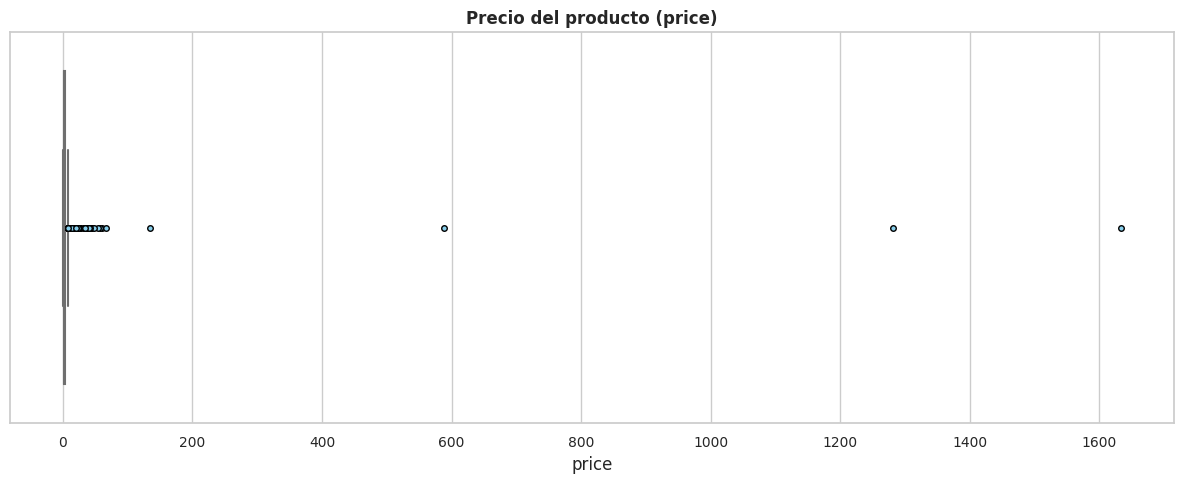

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid", palette="pastel")

flier_props = dict(marker='o', markerfacecolor='skyblue', markersize=4, linestyle='none', markeredgecolor='black')

plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props
)

plt.title('Precio del producto (price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Este diagrama de caja muestra claramente la presencia de valores atípicos en la variable price. La gran mayoría de los productos se concentran en un rango muy estrecho de precios, cerca del eje izquierdo, mientras que algunos valores extremos se alejan considerablemente, superando los 200€. La caja en sí (que representa el rango intercuartílico, entre el Q1 y Q3) es tan pequeña en comparación con los valores máximos, que apenas es visible en la escala del gráfico. Esto confirma lo que vimos en el resumen estadístico: distribución muy sesgada y necesidad de revisar estos valores extremos.

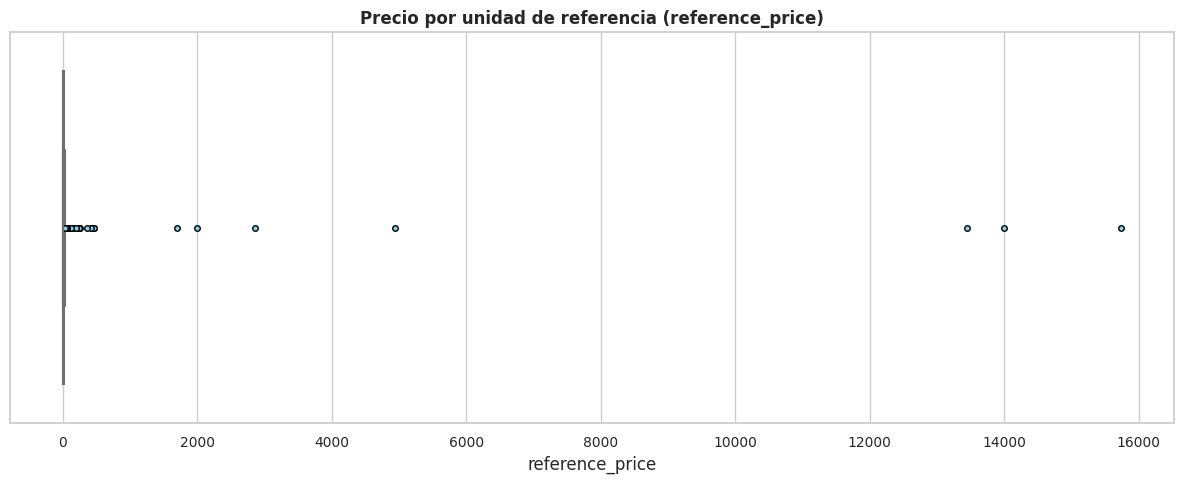

In [24]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['reference_price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props)

plt.title('Precio por unidad de referencia (reference_price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Este boxplot muestra de forma clara que la variable reference_price tiene aún más valores atípicos que price. Aunque la mayoría de los datos se concentran en la zona izquierda del gráfico, aparecen múltiples puntos fuera de escala, llegando incluso a más de 15.000€/kg o L, lo cual resulta completamente fuera de lo común para un supermercado. La caja del diagrama es prácticamente invisible por la enorme escala causada por estos valores extremos. Esto indica una distribución fuertemente asimétrica, con unos pocos productos que distorsionan el eje y ocultan la distribución real del resto de productos. Este comportamiento confirma que hay productos con precios por unidad desproporcionadamente altos. Puede deberse a errores de conversión de unidades (por ejemplo, gramos a kilos) o simplemente a datos mal registrados. Estos outliers deben tratarse antes de cualquier análisis comparativo.



Para entender el origen de los precios anormalmente altos, vamos a examinar en detalle los productos con los valores más elevados en las columnas price y reference_price. Esto nos ayudará a identificar si los outliers están asociados a ciertas categorías, errores de registro o características del producto (como formatos o presentaciones especiales).

In [25]:
# Ordenamos el DataFrame por la columna 'price' en orden descendente
# para obtener los productos con el precio más alto
top_20_price = df.sort_values('price', ascending=False).head(20)
top_20_price


,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date
2089,25867484,mercadona.es,congelados|marisco,Alistado pequeño congelado,Granel,otras marcas,False,1633.50,16.500,kg,2023-03-15 00:00:00.000
2358,25867490,mercadona.es,congelados|marisco,Gamba arrocera Hacendado congelada,Granel,hacendado,True,1282.05,12.950,kg,2023-03-15 00:00:00.000
3405,25869875,mercadona.es,marisco_y_pescado|pescado_fresco,Tiras de potón,Granel,otras marcas,False,589.05,5.950,kg,2023-03-15 00:00:00.000
1375,25854966,carrefour.es,productos_frescos|charcuteria|jamon_serrano_e_...,Jamón de Cebo Ibérico 50% Raza Ibérica Nico pi...,NaN,otras marcas,False,135.00,20.770,kg,2023-03-15 00:00:00.000
2383,25858954,carrefour.es,bebidas|vinos|estuches_de_vino,Vino tinto reserva Federico Paternina Marqués ...,NaN,otras marcas,False,66.50,66.500,ud,2023-03-15 00:00:00.000
565,25859637,carrefour.es,limpieza_y_hogar|menaje|jarras_y_filtros_de_agua,Pack Sistema de Filtración para Grifo BRITA On...,NaN,otras marcas,False,59.90,59.900,ud,2023-03-15 00:00:00.000
1883,25854963,carrefour.es,productos_frescos|charcuteria|jamon_serrano_e_...,Jamón serrano bodega Carrefour El Mercado piez...,NaN,carrefour,True,57.70,8.880,kg,2023-03-15 00:00:00.000
2616,25854964,carrefour.es,productos_frescos|charcuteria|jamon_serrano_e_...,Paleta de cebo ibérica curada 50% raza ibérica...,NaN,otras marcas,False,55.00,13.750,kg,2023-03-15 00:00:00.000
4085,25858706,carrefour.es,bebidas|alcoholes|vodka,Grey Goose Vodka,NaN,otras marcas,False,47.70,68.140,l,2023-03-15 00:00:00.000
3536,25858979,carrefour.es,bebidas|cava_y_champagne|champagne,Möet & Chandon Brut Impérial Champagne,NaN,otras marcas,False,44.95,44.950,ud,2023-03-15 00:00:00.000


Durante el análisis de los productos con los precios más altos (price), observamos dos patrones claramente diferenciados. Por un lado, hay productos premium como el jamón ibérico, cuyo precio elevado está justificado por su peso y su categoría gourmet. Por otro lado, encontramos casos sospechosos en productos del mar, donde el precio total supera de forma desproporcionada al precio por kilo (reference_price). En lugar de eliminar directamente estos registros, lo cual podría hacernos perder información útil, aplicaremos una corrección automatizada en aquellos casos que cumplan las siguientes condiciones:

- la unidad de referencia es kilogramos (reference_unit = kg);

- el valor en price es más de 90 veces superior a reference_price;

- precio es mayor a 30€ (para evitar corregir productos baratos con pequeñas variaciones);

- el nombre del producto no contiene la palabra jamón, ya que los jamones suelen tener precios altos legítimos.

Si se cumplen todos estos criterios, consideramos que hay una alta probabilidad de error y procederemos a dividir el valor de price entre 100, para llevarlo a un rango razonable. Además, marcaremos estas filas con una nueva columna price_corrected = True, de modo que podamos identificarlas fácilmente en el análisis posterior.

In [11]:
# Condición para detectar errores de precio (excluyendo jamón)
condicion_correccion = (
    (df['reference_unit'] == 'kg') &
    ((df['price'] / df['reference_price']) > 90) &
    (df['price'] > 30) &
    (~df['name'].str.contains('jamón', case=False, na=False)))

# Mostramos cuántas filas se van a corregir
print(f"Productos corregidos: {condicion_correccion.sum()}")

# Aplicamos corrección dividiendo el precio por 100
df.loc[condicion_correccion, 'price'] = df.loc[condicion_correccion, 'price'] / 100

# Añadimos una nueva columna con un flag de corrección
df['price_corrected'] = False
df.loc[condicion_correccion, 'price_corrected'] = True

Productos corregidos: 3


Tras aplicar los criterios definidos para detectar precios anómalos, se identificaron 3 productos cuyo precio total (price) era desproporcionadamente alto en comparación con su reference_price. Estos productos fueron corregidos automáticamente dividiendo su precio por 100. Como medida adicional, se añadió una nueva columna price_corrected, que permite identificar fácilmente qué filas han sido modificadas. Esta corrección ayuda a mantener la integridad del análisis sin eliminar registros valiosos, reduciendo así el impacto de posibles errores de carga o tipográficos.

Ahora hacemos lo mismo pero con la columna 'reference_price' que indica el precio por unidad

In [89]:
top_20_reference_price = df.sort_values('reference_price', ascending=False).head(20)
top_20_reference_price

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected
731,25863644,dia.es,congelados|precocinados,TEKEFINGER tequeños de queso caja 190 gr,NaN,tekefinger,False,2.99,15736.84,kg,2023-03-15 00:00:00.000,False
3718,25859636,carrefour.es,limpieza_y_hogar|menaje|jarras_y_filtros_de_agua,Pack Jarra de Agua con Filtro BWT Magnesium Mi...,NaN,otras marcas,False,13.99,13990.00,ud,2023-03-15 00:00:00.000,False
1420,25862632,dia.es,despensa|sal_y_especias,CARMENCITA paellero sazonador para paella con ...,NaN,carmencita,False,2.69,13450.00,kg,2023-03-15 00:00:00.000,False
2805,25862575,dia.es,despensa|sal_y_especias,"SAFRINA azafrán en hebras 0,375 gr",NaN,safrina,False,1.85,4933.33,kg,2023-03-15 00:00:00.000,False
1098,25859645,carrefour.es,limpieza_y_hogar|menaje|vajillas_y_vasos,Vaso Caña de Azucar PAPSTAR - Blanco,NaN,otras marcas,False,2.85,2850.00,ud,2023-03-15 00:00:00.000,False
1669,25859618,carrefour.es,limpieza_y_hogar|menaje|utensilios_de_cocina,Palillo Redondo 2 puntas 800 ud - Madera,NaN,otras marcas,False,1.99,1990.00,ud,2023-03-15 00:00:00.000,False
4816,25859721,carrefour.es,limpieza_y_hogar|bazar|pegamentos_y_siliconas,Pegamento Súper-Glue Loctite 5 gr,NaN,otras marcas,False,8.49,1698.00,kg,2023-03-15 00:00:00.000,False
3634,25864512,dia.es,cuidado_personal|cuidado_corporal|crema_facial,GARNIER sérum antimanchas con vitamina C dosif...,NaN,garnier,False,13.95,465.00,l,2023-03-15 00:00:00.000,False
3671,25865407,mercadona.es,aceite_especias_y_salsas|especias,Azafrán hebra Hacendado,Paquete,hacendado,True,1.70,459.46,100g,2023-03-15 00:00:00.000,False
2730,25864471,dia.es,cuidado_personal|cuidado_corporal|crema_facial,L'OREAL Revitalift laser crema de día triple a...,NaN,NaN,NaN,20.95,419.00,l,2023-03-15 00:00:00.000,False


Al analizar los productos con los precios por unidad (reference_price) más elevados, observamos varios patrones:

1. En algunos casos, la diferencia entre price y reference_price es de hasta tres órdenes de magnitud, lo cual no se justifica por el tipo de producto, sino que parece deberse a errores en el registro o conversión de datos. Por ejemplo, las primeras dos filas.

2. También encontramos productos realmente caros, como el azafrán, que se venden en cantidades mínimas. En estos casos, el precio por kilogramo es naturalmente alto y está justificado.

3. Otro grupo destacado son los cosméticos en pequeños envases, como cremas o sérums. Aunque el precio total no sea excesivo, al expresarlo por litro, la reference_price resulta elevada. En este caso, no se trata de un error, sino de una consecuencia lógica del formato del producto.

Después de revisar manualmente las observaciones con reference_price más alta, confirmamos que sólo en las filas con los índices 731, 3718, 1098, 1669 y 1420 hay un error claro de conversión o unidad de medida. En estos casos, el valor de reference_price es mil veces mayor de lo esperado. Por lo tanto, aplicamos una corrección dividiendo reference_price entre 1000 exclusivamente en esas filas.

In [12]:
# Índices de las filas con error en la reference_price
indices_corregir = [731, 3718, 1669, 1098, 1420]

# Aplicamos la corrección dividiendo entre 1000
df.loc[indices_corregir, 'reference_price'] = df.loc[indices_corregir, 'reference_price'] / 1000

# Añadimos una columna para marcar qué valores han sido corregidos
df.loc[indices_corregir, 'price_corrected'] = True
df['price_corrected'] = df['price_corrected'].fillna(False)

In [13]:
df[['price', 'reference_price']].describe()

,price,reference_price
count,5000.000000,5000.000000
mean,3.617321,10.987060
std,4.410717,76.341534
min,0.160000,0.008000
25%,1.567500,2.150000
50%,2.490000,5.500000
75%,4.000000,11.000000
max,135.000000,4933.330000


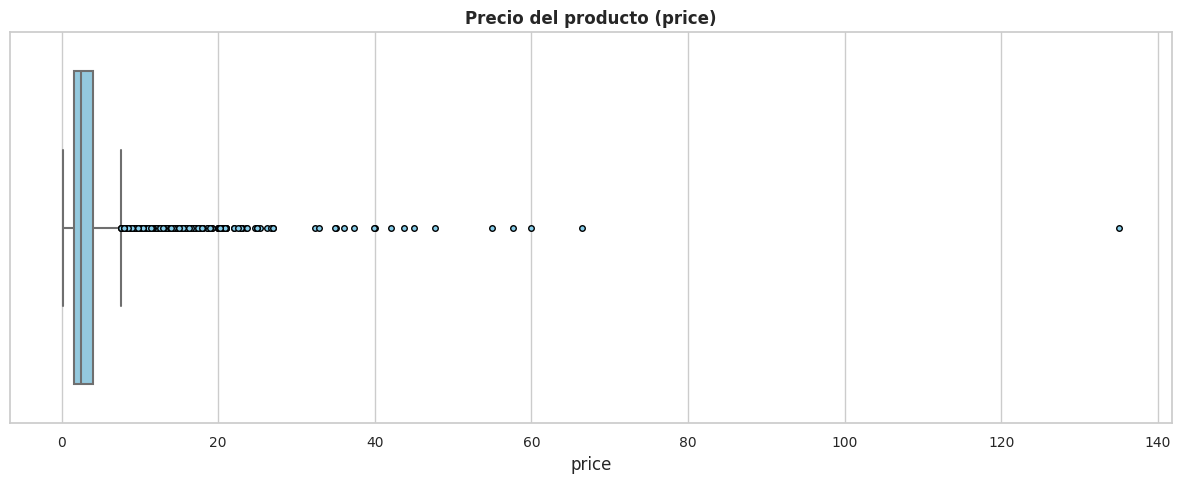

In [92]:
plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props)

plt.title('Precio del producto (price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Con una pequeña intervención puntual, hemos logrado que las métricas clave sean más realistas, eliminando los outliers sin tocar la estructura general del dataset. Ahora tenemos una base mucho más fiable para seguir con el análisis.



In [31]:
top_10_price = df.sort_values('reference_price', ascending=False).head(10)
top_10_price

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected
2805,25862575,dia.es,despensa|sal_y_especias,"SAFRINA azafrán en hebras 0,375 gr",NaN,safrina,False,1.85,4933.33,kg,2023-03-15 00:00:00.000,False
4816,25859721,carrefour.es,limpieza_y_hogar|bazar|pegamentos_y_siliconas,Pegamento Súper-Glue Loctite 5 gr,NaN,otras marcas,False,8.49,1698.00,kg,2023-03-15 00:00:00.000,False
3634,25864512,dia.es,cuidado_personal|cuidado_corporal|crema_facial,GARNIER sérum antimanchas con vitamina C dosif...,NaN,garnier,False,13.95,465.00,l,2023-03-15 00:00:00.000,False
3671,25865407,mercadona.es,aceite_especias_y_salsas|especias,Azafrán hebra Hacendado,Paquete,hacendado,True,1.70,459.46,100g,2023-03-15 00:00:00.000,False
2730,25864471,dia.es,cuidado_personal|cuidado_corporal|crema_facial,L'OREAL Revitalift laser crema de día triple a...,NaN,NaN,NaN,20.95,419.00,l,2023-03-15 00:00:00.000,False
3723,25864480,dia.es,cuidado_personal|cuidado_corporal|crema_facial,L'OREAL Revitalift laser X3 crema de noche ant...,NaN,NaN,NaN,20.95,419.00,l,2023-03-15 00:00:00.000,False
4280,25864478,dia.es,cuidado_personal|cuidado_corporal|crema_facial,L'OREAL Revitalift serum hidratante alisador a...,NaN,NaN,NaN,10.95,365.00,l,2023-03-15 00:00:00.000,False
2419,25864481,dia.es,cuidado_personal|cuidado_corporal|crema_facial,NIVEA Q10 Power crema de día antiarrugas spf 3...,NaN,nivea q,False,12.95,259.00,l,2023-03-15 00:00:00.000,False
49,25862597,dia.es,despensa|sal_y_especias,CARMENCITA orégano frasco 7 gr,NaN,carmencita,False,1.95,243.75,kg,2023-03-15 00:00:00.000,False
3996,25864488,dia.es,cuidado_personal|cuidado_corporal|crema_facial,DIADERMINE crema de día anti-edad botology tar...,NaN,diadermine,False,11.95,239.00,l,2023-03-15 00:00:00.000,False


Al revisar nuevamente los productos con los precios más altos, se observa que los valores elevados actuales son coherentes con la naturaleza de los productos. Por tanto, no se detectan anomalías en esta parte del conjunto de datos.

Es importante revisar también los productos con los valores más bajos de price. Este análisis nos permite detectar posibles errores en el rango inferior, como precios inusualmente bajos causados por errores de entrada o redondeo. A continuación, mostramos los 10 productos con el precio más bajo del conjunto de datos.

In [32]:
# Seleccionamos los 10 productos con el precio más bajo
top_10_mas_baratos = df.sort_values('price', ascending=True).head(10)
top_10_mas_baratos

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected
1045,25870137,mercadona.es,panaderia_y_pasteleria|bolleria_envasada,Rosquillas al cacao Hacendado,NaN,hacendado,True,0.16,5.00,kg,2023-03-15 00:00:00.000,False
341,25870143,mercadona.es,panaderia_y_pasteleria|bolleria_envasada,Rosquito frito con azúcar Hacendado,NaN,hacendado,True,0.20,5.00,kg,2023-03-15 00:00:00.000,False
489,25865543,mercadona.es,agua_y_refrescos|agua,Agua mineral pequeña Aguadoy,Botella,otras marcas,False,0.20,0.40,l,2023-03-15 00:00:00.000,False
2360,25858559,carrefour.es,bebidas|aguas_y_zumos|agua_hasta_075_litros,Agua mineral Fuente Primavera 50 cl.,NaN,otras marcas,False,0.20,0.40,l,2023-03-15 00:00:00.000,False
2348,25870144,mercadona.es,panaderia_y_pasteleria|bolleria_envasada,Rollo con sabor avellana Hacendado,NaN,hacendado,True,0.21,5.00,kg,2023-03-15 00:00:00.000,False
1743,25865539,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Aguadoy,Botella,otras marcas,False,0.24,0.16,l,2023-03-15 00:00:00.000,False
86,25865526,mercadona.es,agua_y_refrescos|agua,Agua mineral pequeña Fondetal,Botella,otras marcas,False,0.25,0.50,l,2023-03-15 00:00:00.000,False
804,25862925,dia.es,bebidas|aguas,DIA agua mineral natural botella 1.5 lt,NaN,dia,False,0.27,0.18,l,2023-03-15 00:00:00.000,False
2387,25868895,mercadona.es,fruta_y_verdura|verdura,Tomate kumato negro,Pieza,otras marcas,False,0.27,2.49,kg,2023-03-15 00:00:00.000,False
1632,25868910,mercadona.es,fruta_y_verdura|verdura,Pimiento verde freír,Pieza,otras marcas,False,0.27,2.49,kg,2023-03-15 00:00:00.000,False


Observamos que los valores son totalmente coherentes con el tipo de producto. Se trata principalmente de productos de bajo coste, como agua embotellada, bollería industrial en porciones pequeñas o verduras sueltas. Los precios están en torno a los 0,16 – 0,27 €, lo cual es razonable para este tipo de artículos.
No es necesario aplicar ninguna corrección en esta parte del dataset.

Ahora vamos a ver también los productos con los precios por unidad (reference_price) más bajos.

In [33]:
# Seleccionamos los 10 productos con el reference_price más bajo
top_10_mas_baratos_reference_price = df.sort_values('reference_price', ascending=True).head(10)
top_10_mas_baratos_reference_price

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected
425,25868161,mercadona.es,cuidado_facial_y_corporal|cuidado_e_higiene_fa...,Discos desmaquillantes Deliplus redondos algod...,Paquete,deliplus,True,1.15,0.008,ud,2023-03-15 00:00:00.000,False
2538,25859684,carrefour.es,limpieza_y_hogar|papeleria|pequeno_accesorio,400 Notas adhesivas 76X76,NaN,otras marcas,False,2.99,0.010,ud,2023-03-15 00:00:00.000,False
987,25869460,mercadona.es,limpieza_y_hogar|papel_higienico_y_celulosa,Servilleta papel suave Bosque Verde,Paquete,bosque verde,True,1.50,0.015,ud,2023-03-15 00:00:00.000,False
4126,25869473,mercadona.es,limpieza_y_hogar|papel_higienico_y_celulosa,Pañuelos de papel Aloe Vera Bosque Verde,Paquete,bosque verde,True,1.45,0.015,ud,2023-03-15 00:00:00.000,False
4535,25866273,mercadona.es,bebe|toallitas_y_panales,Toallitas bebé cremosas Deliplus,Paquete,deliplus,True,1.45,0.019,ud,2023-03-15 00:00:00.000,False
157,25869421,mercadona.es,limpieza_y_hogar|menaje_y_conservacion_de_alim...,Film Transparente Bosque Verde,Caja,bosque verde,True,1.60,0.020,m,2023-03-15 00:00:00.000,False
4127,25860043,carrefour.es,parafarmacia|bebe|accesorios_bano,Bastoncillos Suavinex 150 uds,NaN,otras marcas,False,2.49,0.020,ud,2023-03-15 00:00:00.000,False
4404,25859481,carrefour.es,limpieza_y_hogar|conservacion_de_alimentos|fil...,Film transparente con sierra de corte Carrefou...,NaN,carrefour,True,1.25,0.020,m,2023-03-15 00:00:00.000,False
346,25869424,mercadona.es,limpieza_y_hogar|menaje_y_conservacion_de_alim...,Bolsas Congelación medianas Bosque Verde,Caja,bosque verde,True,0.80,0.020,ud,2023-03-15 00:00:00.000,False
1752,25859277,carrefour.es,limpieza_y_hogar|productos_para_bano|limpiador...,Toallitas para wc frescor fresco Carrefour 40 ud.,NaN,carrefour,True,0.99,0.020,ud,2023-03-15 00:00:00.000,False


Al observar los productos con el precio de referencia más bajo, notamos que se trata principalmente de artículos de uso doméstico diario, como:

- pañuelos de papel;

- servilletas;

- bastoncillos de algodón;

- filtros de café;

- discos desmaquillantes.

Estos productos suelen venderse en formatos muy ligeros o individuales, lo cual explica su bajo precio por unidad de medida. Los valores observados (de 0.008 a 0.020 €/ud) son coherentes con su naturaleza y volumen, por lo tanto, no requieren corrección.

Para visualizar de forma más clara la distribución de los precios de todos los productos del supermercado, generamos un histograma que muestra la cantidad de artículos en cada rango de precio.

<Axes: >

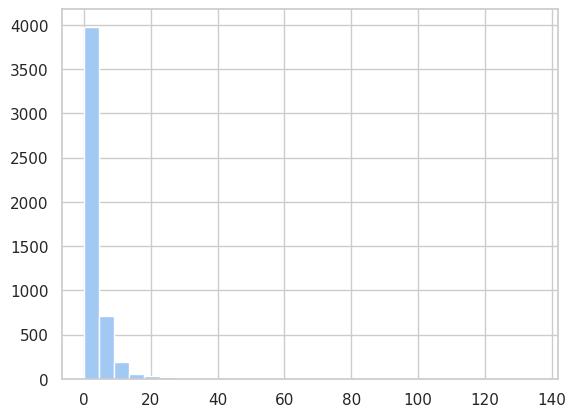

In [94]:
# La distribución final de los precios
df["price"].hist(bins=30)

La mayoría de los productos tienen un precio entre 0 y 20 euros, con un pico en torno a los 1-5 euros. La distribución es asimétrica con una cola larga hacia la derecha, lo que indica que existe un pequeño número de artículos con precios elevados (superiores a 20 euros). Esto es coherente con el tipo de tienda, donde predominan productos de consumo básico y precios accesibles.


<Axes: >

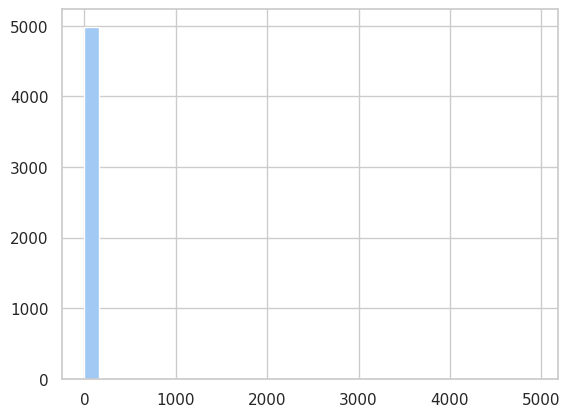

In [95]:
# La distribución final de reference_price
df["reference_price"].hist(bins=30)

La distribución del reference_price es altamente asimétrica: casi todos los valores están agrupados cerca de 0-20, mientras que unos pocos productos presentan precios por unidad extremadamente altos (hasta 5000). Esto distorsiona la escala del gráfico.

# Análisis de valores únicos en campos clave

### Depuración de duplicados y errores de categorización por ID

En esta etapa analizamos la cantidad de valores únicos en columnas esenciales del conjunto de datos, como el identificador del producto, el nombre, la categoría y la subcategoria. Conocer los valores únicos es útil para evaluar la diversidad de los datos y detectar posibles inconsistencias.

In [14]:
num_unique_id = df['id'].nunique()
num_unique_id

5000

El dataset contiene 5000 registros y 5000 identificadores únicos (id), lo que significa que no hay productos repetidos según su id.


Verificamos si existen productos duplicados que tienen todas las características iguales (nombre, descripción, precio, unidad de referencia, categorías y subcategorías), pero con identificadores id diferentes. Para detectarlos, agrupamos por todas las columnas excepto el id, y seleccionamos aquellos grupos en los que aparece más de un id distinto.

In [15]:
# Especificamos las columnas que deben coincidir completamente (excepto 'id')
columnas_comparacion = ['name', 'description', 'price', 'reference_price', 'reference_unit', 'category']

# Agrupamos por esas columnas y contamos cuántos id distintos hay en cada grupo
grupos = df.groupby(columnas_comparacion)['id'].nunique().reset_index(name='conteo_id')

# Seleccionamos solo los grupos donde hay más de un id distinto
grupos_con_multiples_id = grupos[grupos['conteo_id'] > 1]

# Hacemos merge para extraer las filas originales que coinciden con estos grupos
df_casi_igual_id_dist = df.merge(
    grupos_con_multiples_id.drop(columns='conteo_id'),
    on=columnas_comparacion,
    how='inner')
df_casi_igual_id_dist

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected


No se han encontrado duplicados de este tipo. Es decir, no hay productos que sean exactamente iguales en todas las columnas clave y que tengan diferentes id. Esto sugiere que el dataset está bien estructurado en este aspecto, sin registros repetidos innecesariamente bajo diferentes identificadores.

###  Análisis y estandarización de nombres de productos

Calculamos cuántos nombres de productos distintos existen en la columna name.

In [16]:
num_unique_name = df['name'].nunique()
num_unique_name

4909

En el conjunto de datos hay 5000 id únicos, pero solo 4909 nombres de producto diferentes. Esto significa que algunos nombres se repiten, lo que sugiere que un mismo producto puede estar registrado bajo distintos id. Probablemente se trata de diferentes presentaciones, tamaños o duplicados. Vamos a identificar los nombres que están asociados a más de un id, y analizaremos si realmente se trata del mismo producto o no.

In [17]:
# Agrupamos por nombre de producto y contamos cuántos id distintos hay para cada nombre
conteo_id_por_nombre = (df.groupby('name')['id'].nunique().reset_index(name='conteo_id'))

# Filtramos aquellos nombres que están asociados a más de un id
nombres_repetidos = conteo_id_por_nombre[conteo_id_por_nombre['conteo_id'] > 1]

# Ordenamos por número de id distintos asociados
nombres_repetidos = nombres_repetidos.sort_values(by='conteo_id', ascending=False)
nombres_repetidos

,name,conteo_id
972,Cerveza Clásica Steinburg,4
4128,Refresco Coca-Cola Zero azúcar,4
2916,Leche semidesnatada sin lactosa Hacendado,4
988,Cerveza clásica Mahou,4
181,Agua mineral grande Aguadoy,3
...,...,...
4597,Toallitas Refrescantes Deliplus,2
4666,Trozos en salsa perro adulto Delikuit con salm...,2
4900,Zumo de naranja recién exprimido Hacendado,2
4901,Zumo de naranja selección Hacendado,2


Hemos detectado que 77 nombres de productos aparecen asociados a más de un id distinto en el dataset. Esto puede deberse a diferentes formatos o presentaciones (por ejemplo, distintos tamaños o volúmenes), o duplicaciones accidentales durante la carga de los datos.

Ahora extraemos del dataframe original todas las filas donde el campo name pertenece a esta lista y las ordenamos por name e id. Esto facilita la revisión visual y nos permite comprobar si realmente existen diferencias justificadas entre los registros con el mismo nombre o si se trata simplemente de duplicación con diferentes identificadores.

In [18]:
# Creamos una lista con los nombres que están asociados a más de un id
nombres_duplicados = nombres_repetidos['name'].tolist()

# Filtramos el dataframe original para quedarnos solo con los nombres duplicados
df_nombres_duplicados = df[df['name'].isin(nombres_duplicados)]

# Ordenamos por nombre y luego por ID para facilitar el análisis visual
df_nombres_duplicados = df_nombres_duplicados.sort_values(by=['name', 'id'])

# Mostramos los primeros 20 registros
df_nombres_duplicados.head(20)

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected
1186,25865366,mercadona.es,aceite_especias_y_salsas|aceite_vinagre_y_sal,"Aceite de girasol refinado 0,2º Hacendado",Garrafa,hacendado,True,8.95,1.790,l,2023-03-15 00:00:00.000,False
2245,25865367,mercadona.es,aceite_especias_y_salsas|aceite_vinagre_y_sal,"Aceite de girasol refinado 0,2º Hacendado",Botella,hacendado,True,1.95,1.950,l,2023-03-15 00:00:00.000,False
4948,25865355,mercadona.es,aceite_especias_y_salsas|aceite_vinagre_y_sal,"Aceite de oliva 0,4º Hacendado",Garrafa,hacendado,True,23.63,4.726,l,2023-03-15 00:00:00.000,False
4059,25865356,mercadona.es,aceite_especias_y_salsas|aceite_vinagre_y_sal,"Aceite de oliva 0,4º Hacendado",Botella,hacendado,True,4.77,4.770,l,2023-03-15 00:00:00.000,False
1652,25865536,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Aguadoy,Garrafa,otras marcas,False,0.86,0.108,l,2023-03-15 00:00:00.000,False
737,25865537,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Aguadoy,Garrafa,otras marcas,False,0.75,0.125,l,2023-03-15 00:00:00.000,False
1743,25865539,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Aguadoy,Botella,otras marcas,False,0.24,0.160,l,2023-03-15 00:00:00.000,False
627,25865534,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Lanjarón,Pack-6,otras marcas,False,4.20,0.467,l,2023-03-15 00:00:00.000,False
3742,25865535,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Lanjarón,Botella,otras marcas,False,0.73,0.487,l,2023-03-15 00:00:00.000,False
4946,25865527,mercadona.es,agua_y_refrescos|agua,Agua mineral grande Nestlé Aquarel,Garrafa,otras marcas,False,1.69,0.338,l,2023-03-15 00:00:00.000,False


En la tabla se observa que varios productos comparten el mismo nombre, pero difieren en el formato del envase, el peso y el precio. Este comportamiento es normal en los datos de productos: un mismo producto puede estar disponible en diferentes tamaños o envases. Por lo tanto, los nombres repetidos no siempre indican duplicados.

### Análisis y estandarización de categorias

Calculamos la cantidad de categorias unicas.




In [19]:
num_unique_category = df['category'].nunique()
num_unique_category

625

En esta etapa analizamos si un mismo nombre de producto (name) aparece en distintas categorías o subcategorías. Este comportamiento puede indicar errores en la clasificación. Agrupamos los datos por name y contamos cuántos valores únicos hay en las columnas de categoría correspondientes. Luego filtramos aquellos nombres que están asociados a más de una categoría. Esto nos ayudará a detectar posibles inconsistencias en la categorización de los productos.

In [20]:
# Agrupamos los datos por 'name' y contamos cuántos valores únicos tiene columna de categorización
agrupacion_nombre = df.groupby('name').agg({'category': pd.Series.nunique}).reset_index()

# Renombramos las columnas para claridad
agrupacion_nombre.columns = ['name', 'num_category']

# Filtramos solo aquellos nombres que aparecen en más de una categoría o subcategoría
nombres_en_varias_categorias = agrupacion_nombre[agrupacion_nombre['num_category'] > 1]

# Mostramos cuántos casos encontramos
print(f"Nombres que aparecen en múltiples categorías: {len(nombres_en_varias_categorias)}")

# Si queremos ver algunos ejemplos manualmente:
nombres_en_varias_categorias.head(10)

Nombres que aparecen en múltiples categorías: 0


,name,num_category


El resultado muestra que no se ha encontrado ningún nombre de producto que aparezca en varias categorías. Es decir, cada nombre está asociado de forma única a una sola categoría dentro del dataset.

### Análisis y estandarización de "reference_unit"

Vamos a comprobar la coherencia y estandarización de los valores en la columna reference_unit, que representa la unidad de medida del producto (kilogramos, litros, unidades, etc.).Es importante asegurarnos de que no existan errores tipográficos, espacios adicionales, formatos duplicados (por ejemplo: Kg, kg., KG) o valores no esperados. Vamos a mostrar todas las unidades únicas, su frecuencia, y detectar posibles casos problemáticos.

In [21]:
# Contamos la frecuencia de cada unidad para detectar valores raros
conteo_unidades = df['reference_unit'].value_counts()
conteo_unidades

,count
reference_unit,
kg,2576
l,1257
ud,807
100ml,247
100g,58
lavado,35
m,12
docena,7
g,1


Al revisar los valores únicos en la columna reference_unit, observamos que se utilizan 9 tipos diferentes de unidades, y todas ellas son habituales en el entorno de productos de supermercado. Las más comunes son kg, l y ud, como era de esperar. También aparecen unidades específicas como 100ml, 100g, docena, lavado, m o incluso g. Aunque algunas tienen menor frecuencia, todas reflejan formatos reales de presentación de productos, como packs pequeños, detergentes o frutas a granel. En conclusión, no se detectan errores ni valores anómalos. No es necesario aplicar correcciones ni unificaciones en este momento

### Selección de la fecha más reciente

In [22]:
num_unique_category = df['insert_date'].nunique()
num_unique_category

1

Al analizar la columna insert_date, observamos que todos los registros tienen exactamente la misma fecha. No es necesario filtrar por fecha más reciente, ya que todos los datos fueron insertados en la misma fecha.

Volvemos a revisar la estructura general del DataFrame para asegurarnos de que no se haya perdido información importante en el proceso de transformaciones.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5000 non-null   int64  
 1   supermarket                5000 non-null   object 
 2   category                   5000 non-null   object 
 3   name                       4999 non-null   object 
 4   description                1832 non-null   object 
 5   trademark                  4921 non-null   object 
 6   trademark_propietary_flag  4921 non-null   object 
 7   price                      5000 non-null   float64
 8   reference_price            5000 non-null   float64
 9   reference_unit             5000 non-null   object 
 10  insert_date                5000 non-null   object 
 11  price_corrected            5000 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 434.7+ KB


Durante la revisión final del DataFrame observamos que la columna insert_date está almacenada como object. Convertiremos la columna insert_date al tipo de fecha.

In [35]:
# Convertimos la columna insert_date al tipo datetime
df['insert_date'] = pd.to_datetime(df['insert_date'], format='%Y-%m-%d')
print(df['insert_date'].dtype)

datetime64[ns]


In [36]:
df['insert_date'].unique()

<DatetimeArray>
['2023-03-15 00:00:00']
Length: 1, dtype: datetime64[ns]

In [37]:
# Dejamos solo la fecha
df['insert_date'] = df['insert_date'].dt.date

In [38]:
df.info()

,id,supermarket,category,name,description,trademark,trademark_propietary_flag,price,reference_price,reference_unit,insert_date,price_corrected
0,25869112,mercadona.es,huevos_leche_y_mantequilla|mantequilla_y_marga...,Margarina Flora Original,Tarrina,otras marcas,False,3.45,8.625,kg,2023-03-15,False
1,25855500,carrefour.es,productos_frescos|platos_preparados|fritos,Nuggets de pechuga de pollo 250 g,NaN,otras marcas,False,3.10,12.400,kg,2023-03-15,False
2,25867724,mercadona.es,conservas_caldos_y_cremas|berberechos_y_mejill...,Mejillones picantes en escabeche Hacendado peq...,Lata,hacendado,True,1.65,23.914,kg,2023-03-15,False
3,25862155,dia.es,despensa|conservas|conservas_vegetales,CARRETILLA espárragos blancos extra 8/12 lata ...,NaN,carretilla,False,3.05,20.330,kg,2023-03-15,False
4,25861733,dia.es,despensa|desayunos_y_dulces|caramelos_chicles_...,DIA ICEBERG chicle sabor sandía sin azúcar bol...,NaN,dia,True,0.99,22.100,kg,2023-03-15,False


### Análisis y estandarización de columnas de "trademark"

In [40]:
num_unique_category = df['trademark_propietary_flag'].nunique()
num_unique_category

2

Al revisar la columna trademark_proprietary_flag, vemos que contiene 2 valores únicos, pero su tipo de dato actual es object, cuando en realidad representa un campo booleano (marca propia: sí o no). Debemos explorar los valores únicos concretos y luego convertir la columna al tipo bool para facilitar análisis posteriores y asegurar coherencia de tipos.

In [41]:
# Vemos los valores únicos exactos
df['trademark_propietary_flag'].unique()

array([False, True, nan], dtype=object)

Podemos convertir la columna a tipo booleano aunque haya NaN, usando pandas.BooleanDtype(). Este tipo admite True, False y NaN, y es ideal para campos como este.



In [42]:
# Convertimos la columna a booleano
df['trademark_propietary_flag'] = df['trademark_propietary_flag'].astype('boolean')

# Verificamos el nuevo tipo
df['trademark_propietary_flag'].dtype

BooleanDtype

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5000 non-null   int64  
 1   supermarket                5000 non-null   object 
 2   category                   5000 non-null   object 
 3   name                       4999 non-null   object 
 4   description                1832 non-null   object 
 5   trademark                  4921 non-null   object 
 6   trademark_propietary_flag  4921 non-null   boolean
 7   price                      5000 non-null   float64
 8   reference_price            5000 non-null   float64
 9   reference_unit             5000 non-null   object 
 10  insert_date                5000 non-null   object 
 11  price_corrected            5000 non-null   bool   
dtypes: bool(1), boolean(1), float64(2), int64(1), object(7)
memory usage: 405.4+ KB


In [44]:
num_unique_category = df['trademark'].nunique()
num_unique_category

642

Al analizar la columna trademark, vemos que contiene 642 valores únicos. Esto indica una gran variedad de marcas comerciales en el dataset.

Después de todo el proceso de limpieza y revisión, ya tenemos un dataset coherente y sin errores estructurales. Está en condiciones óptimas para continuar con análisis, visualizaciones o comparativas con otros supermercados.


# Converción a un archivo .csv

In [45]:
# Guardamos el DataFrame limpio en un archivo CSV sin índice, con codificación utf-8-sig
df.to_csv('limpio_datamarket.csv', index=False, encoding="utf-8-sig")

# Verificación de coincidencias de id entre supermercados

El objetivo de esta sección es determinar si los supermercados comparten los mismos product_id o si cada uno utiliza su propio sistema. Calculamos cuántos product_id únicos hay en cada supermercado y comparamos la suma con el número total de product_id únicos en el conjunto de datos.
Si la suma coincide, entonces no hay solapamientos y los productos no están vinculados entre supermercados.

In [46]:
# Contamos cuántos productos únicos hay en Mercadona
num_unique_id_mercadona = df[df["supermarket"] == "mercadona.es"]['id'].nunique()
num_unique_id_mercadona

2024

In [47]:
# Contamos cuántos productos únicos hay en Carrefour
num_unique_id_carrefour = df[df["supermarket"] == "carrefour.es"]['id'].nunique()
num_unique_id_carrefour

953

In [48]:
# Contamos cuántos productos únicos hay en Día
num_unique_id_dia = df[df["supermarket"] == "dia.es"]['id'].nunique()
num_unique_id_dia

2023

In [49]:
# Verificamos si la suma coincide con el total de productos únicos
num = num_unique_id_mercadona + num_unique_id_dia + num_unique_id_carrefour
num

5000

Hemos confirmado que cada supermercado utiliza su propio sistema de product_id. La suma de product_id únicos por supermercado coincide con el total del conjunto de datos, lo que indica que no hay identificadores compartidos entre supermercados. Esto es importante a tener en cuenta al diseñar el modelo de datos y realizar análisis posteriores.

# Comparación de categorías entre supermercados

El siguiente paso lógico es comprobar si las categorías de productos son comparables entre supermercados. Nos proponemos responder:

¿Existen categorías con nombres idénticos en varios supermercados?

¿Qué tan grande es la intersección entre las listas de categorías de Mercadona, Carrefour y Dia?

¿Es posible usar el campo category para enlazar productos similares?

In [50]:
num_unique_category_mercadona = df[df["supermarket"] == "mercadona.es"]['category'].nunique()
num_unique_category_mercadona

150

In [51]:
num_unique_category_carrefour = df[df["supermarket"] == "carrefour.es"]['category'].nunique()
num_unique_category_carrefour

318

In [52]:
num_unique_category_dia = df[df["supermarket"] == "dia.es"]['category'].nunique()
num_unique_category_dia

159

In [53]:
# Verificamos si la suma coincide con el total de productos únicos
num_category = num_unique_category_mercadona + num_unique_category_carrefour + num_unique_category_dia
num_category

627

Anteriormente identificamos que el número total de categorías únicas en el dataset combinado es 625, mientras que la suma de categorías únicas por supermercado individualmente es 627. Esto indica que 2 categorías están duplicadas entre supermercados, es decir, aparecen en al menos dos. Pero dicha coincidencia es poco significativa. Esto confirma que cada supermercado utiliza su propio sistema de categorización, lo que dificulta una comparación directa. Para continuar con el análisis será necesario crear un catálogo unificado de categorías.

# Distribución y características de las marcas comerciales

En este apartado realizamos un análisis exploratorio de la columna trademark, que contiene información sobre la marca comercial de cada producto. Este campo es clave para entender la diversidad de la oferta, el peso de las marcas propias frente a las externas, y el posible posicionamiento de ciertas marcas en términos de precio y categoría.


Exploramos cómo se distribuyen las marcas comerciales (trademark) en los distintos supermercados. Este análisis nos permite entender el grado de diversidad de marcas que ofrece cada cadena, así como identificar qué supermercados apuestan más por marcas propias o externas. Comenzamos calculando cuántas marcas distintas aparecen en cada supermercado y luego exploramos cuáles son las marcas más frecuentes en cada uno de ellos.

In [54]:
# Agrupamos por supermercado y contamos cuántas marcas únicas hay en cada uno
marcas_por_super = df.groupby('supermarket')['trademark'].nunique().sort_values(ascending=False).reset_index()

# Mostramos la cantidad de marcas distintas por supermercado
marcas_por_super

,supermarket,trademark
0,dia.es,637
1,mercadona.es,4
2,carrefour.es,2


Los resultados muestran que Dia tiene 637 marcas distintas, mientras que Mercadona y Carrefour presentan solo 4 y 2 respectivamente. Esta diferencia es demasiado grande y probablemente no refleja la realidad, sino que indica que en esos supermercados los valores de trademark están mayoritariamente vacíos (NaN). Por lo tanto, realizamos una verificación adicional para contar cuántos valores nulos y no nulos hay en la columna trademark por supermercado.

In [55]:
# Contamos cuántos valores no nulos hay por supermercado en la columna 'trademark'
no_nulos_por_super = df.groupby('supermarket')['trademark'].apply(lambda x: x.notna().sum())

# Contamos cuántos valores nulos hay por supermercado
nulos_por_super = df.groupby('supermarket')['trademark'].apply(lambda x: x.isna().sum())

# Combinamos ambos resultados en una tabla
verificacion_trademark = pd.DataFrame({
    'no_nulos': no_nulos_por_super,
    'nulos': nulos_por_super}).reset_index()

# Mostramos los resultados
verificacion_trademark

,supermarket,no_nulos,nulos
0,carrefour.es,953,0
1,dia.es,1944,79
2,mercadona.es,2024,0


Observamos que, si bien la columna trademark no contiene valores nulos para los supermercados Mercadona y Carrefour, el número de marcas distintas detectadas era sorprendentemente bajo. Esto nos lleva a sospechar que la mayoría de los productos en estas cadenas están asociados a unas pocas marcas predominantes o que los datos están uniformizados de una forma particular (por ejemplo, todo como "Hacendado" o "otras marcas"). Para confirmar esto, vamos a inspeccionar directamente cuáles son las marcas registradas en la columna trademark para cada supermercado.

In [56]:
# Extraemos y mostramos las marcas únicas registradas en Mercadona
marcas_mercadona = df[df['supermarket'] == 'mercadona.es']['trademark'].unique()
print(marcas_mercadona)

['otras marcas' 'hacendado' 'bosque verde' 'deliplus']


In [57]:

# Extraemos y mostramos las marcas únicas registradas en Carrefour
marcas_carrefour = df[df['supermarket'] == 'carrefour.es']['trademark'].unique()
print(marcas_carrefour)

['otras marcas' 'carrefour']


La baja diversidad de marcas en Mercadona y Carrefour no es un error de los datos, sino una característica real de su modelo comercial. Mercadona opera con marcas blancas propias y todas otras marcas estan agrupados como "otras marcas".
Carrefour también centraliza su oferta en su propia marca "carrefour" y "otras marcas". Esto explica por qué el número de marcas únicas detectadas es mucho menor que en DIA, que ofrece un surtido más amplio de marcas externas.

In [58]:
# Extraemos y mostramos las marcas únicas registradas en Dia
marcas_dia = df[df['supermarket'] == 'dia.es']['trademark'].unique()
print(marcas_dia)

['carretilla' 'dia' 'gallina blanca' 'destapa la huerta' 'mistol'
 'colgate' 'pepsi' 'solan de cabras' 'nb palmolive' 'hornimans' 'pato'
 'la gergaleña' 'la española' 'campo curero' 'nestea' 'luxidermia'
 'carmencita' 'asturiana' nan 'el pavo' 'gourmet' 'aneto' 'elpozo' 'valor'
 'pavofrío' 'colacao' 'kas' 'royal' 'congelados de navarra' 'nativa'
 'dani' 'rio seco' 'ausonia' 'la masia' 'solano' 'filmfix' 'pikotas'
 'gullon' 'san miguel' 'pom' 'trident o' 'la lechera' 'artiach d' 'trapa'
 'mourama' 'mayor de castilla' 'castillo de haro' 'prima' 'burned barrel'
 'johnson' 'bajoz' 'natur dacsa' 'babaria' 'diadermine l' 'la filo'
 'la receta' 'dr oetker' 'barilla' 'vileda' 'ybarra' 'ortiz' 'bonte'
 'iroha' 'dolce gusto' 'spontex' 'biotobio' 'minerva' 'barmon' 'iberia p'
 'original remedies' 'as' 'mandul' 'casa tarradellas' 'pote' 'los molinos'
 'aperol' 'sanex' 'natural honey' 'matsu e' 'condominium' 'timotei'
 'bombay c' 'kelloggs' 'nivea men' 'nike' 'cesar' 'mentos' 'miller'
 'jolca' 'don

A diferencia de Mercadona o Carrefour, que agrupan sus productos principalmente bajo marcas propias claramente identificadas, Dia mantiene una estructura más diversa donde sus marcas propias coexisten con muchas marcas externas. Vamos a:
- filtrar los productos de Dia cuya marca ha sido registrada como propia (trademark_proprietary_flag == True);

- contar cuántas marcas propias diferentes tiene;

- mostrar sus nombres únicos.



In [59]:
# Filtramos solo los productos del supermercado Dia con marca propia
marcas_propias_dia = df[(df['supermarket'] == 'dia.es') & (df['trademark_propietary_flag'] == True)]

# Mostramos el número de marcas propias distintas
num_marcas_propias_dia = marcas_propias_dia['trademark'].nunique()
print(f"Número de marcas propias en Dia: {num_marcas_propias_dia}")

# Mostramos los nombres únicos de esas marcas propias
print(marcas_propias_dia['trademark'].unique())

Número de marcas propias en Dia: 1
['dia']


Aunque el surtido de productos en Dia es muy amplio y variado en términos de marcas comerciales, solamente una ha sido identificada explícitamente como marca propia en la base de datos: la marca 'dia'. Esto indica que, a diferencia de Mercadona (que usa varias marcas blancas), Dia concentra sus productos propios bajo un único nombre comercial igual como Carrefour.

Analizamos el peso relativo de las marcas propias frente a las marcas externas en cada supermercado. Esto nos permite visualizar hasta qué punto cada cadena apuesta por productos de marca blanca (propios) o depende de proveedores externos. Utilizamos la columna trademark_proprietary_flag para clasificar los productos y agrupamos por supermarket para comparar entre cadenas.

In [60]:
# Creamos una nueva columna con el tipo de marca: 'Propia', 'Externa' o 'Desconocida' (si es NaN)
df['tipo_marca'] = df['trademark_propietary_flag'].map({True: 'Propia', False: 'Externa'})
df['tipo_marca'] = df['tipo_marca'].fillna('Desconocida')

# Contamos cuántos productos hay por supermercado y tipo de marca
distribucion_marcas = df.groupby(['supermarket', 'tipo_marca']).size().unstack(fill_value=0)

# Mostramos la tabla
distribucion_marcas

tipo_marca,Desconocida,Externa,Propia
supermarket,,,
carrefour.es,0,592,361
dia.es,79,1475,469
mercadona.es,0,823,1201


<Axes: title={'center': 'Distribución de marcas por supermercado'}, xlabel='supermarket'>

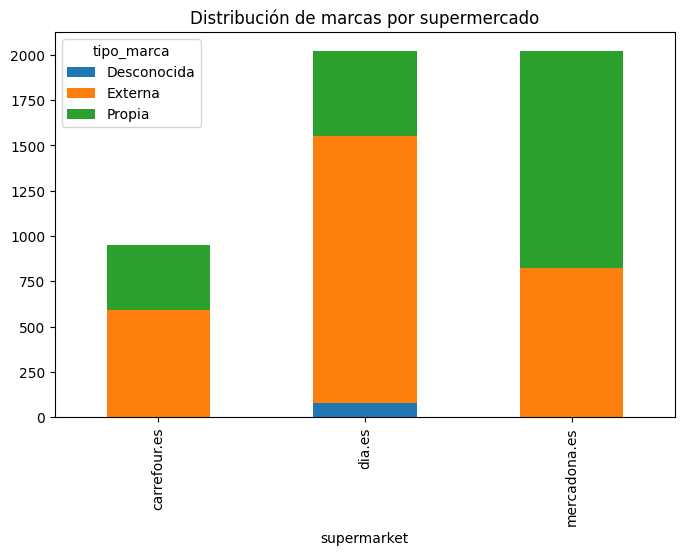

In [61]:
# Representación gráfica
distribucion_marcas.plot(kind='bar', stacked=True, figsize=(8,5), title="Distribución de marcas por supermercado")

El gráfico de barras apiladas nos muestra de forma clara cómo se distribuyen las marcas propias, externas y desconocidas entre los tres supermercados:

1. Mercadona destaca por su estrategia de marca blanca: la mayoria de sus productos están etiquetados como marcas propias.

2. Dia ofrece una gran diversidad de marcas externas, con una pequeña porción marcada como marca propia 'dia' y una fracción mínima no identificada (Desconocida).

3. Carrefour sí tiene una proporción considerable de productos etiquetados como marca propia. Distribución aproximada: 30% marcas propias y 70% marcas externas.

Cada supermercado sigue una estrategia distinta.



Como resultado del EDA del dataset de productos de supermercados, hemos realizado un trabajo exhaustivo de depuración, estandarización y análisis de datos. Este trabajo preparatorio proporciona una base sólida para los siguientes pasos analíticos, que incluyen la creación de modelo, la detección de tendencias y el análisis del entorno competitivo y de precios.